In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_excel('Product_Survey_Results.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               100 non-null    object
 1   Which age group do you belong to?                                                                                       100 non-null    object
 2   What is your gender?                                                                                                    100 non-null    object
 3   Which category do you currently belong to?                                                                              100 non-null    object
 4   Whi

,Timestamp,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)"
0,2021/09/26 4:11:56 PM GMT+8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
1,2021/10/08 1:03:51 PM GMT+8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Very likely,Headlights;Side mirrors;Bumpers,Centre compartment;Door handles;Dashboard,500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
2,2021/10/08 1:11:45 PM GMT+8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Functionality;Size...,Very likely,Wheels,Steering wheel;Centre compartment;Door handles...,500-1000,Yes,500-1000,"No, I would need a designer to model my sketch"
3,2021/10/08 1:16:36 PM GMT+8,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
4,2021/10/08 1:22:02 PM GMT+8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own"


In [3]:
#dropping unneeded columns
df=df.drop('Timestamp',1)
df.head()


C:\Users\weiji\AppData\Local\Temp\ipykernel_17508\2534704958.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Timestamp',1)


,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)"
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Very likely,Headlights;Side mirrors;Bumpers,Centre compartment;Door handles;Dashboard,500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Functionality;Size...,Very likely,Wheels,Steering wheel;Centre compartment;Door handles...,500-1000,Yes,500-1000,"No, I would need a designer to model my sketch"
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own"


In [4]:
#renaming the df
df.columns = df.columns.str.replace(' ', '')
df=df.rename(columns={
    'Whichagegroupdoyoubelongto?':'age',
    'Whatisyourgender?':'gender',
    'Whichcategorydoyoucurrentlybelongto?':'car_status',
    'Whichofthefollowingbestdescribesyou?':'rs_status',
    'Whichofthesefactorsareimportanttoyouwhendecidingwhichcartopurchase?':'purchase_factors',
    'Howlikelyareyoutooptforcustomisedvehicleiftherewerenoextracharges?':'cust_willingness',
    'Whichofthefollowingexteriorcomponentswouldyouchoosetocustomise(texture,layout,size,etc)?':'cust_comp_ext',
    'Whichofthefollowinginteriorcomponentswouldyouchoosetocustomise(texture,layout,size,etc)?':'cust_comp_int',
    'Howmuchareyouwillingtospendoncarcustomisationifsurchargesareapplicable?':'cust_cost',
    'Areyouinterestedindesigningyourowncomponentstopersonaliseyourcar?':'personalise_interest',
    'Howmuchareyouwillingtopayforthepersonaliseddesign?':'personalise_cost',
    'Doyouhaveany3Ddesignexperiencethatwouldhelpwiththedesignprocess?(e.g.AutoCAD,SolidWorks,Blender,etc)':'personalise_ability'
    
})
df.head()

,age,gender,car_status,rs_status,purchase_factors,cust_willingness,cust_comp_ext,cust_comp_int,cust_cost,personalise_interest,personalise_cost,personalise_ability
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Very likely,Headlights;Side mirrors;Bumpers,Centre compartment;Door handles;Dashboard,500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Functionality;Size...,Very likely,Wheels,Steering wheel;Centre compartment;Door handles...,500-1000,Yes,500-1000,"No, I would need a designer to model my sketch"
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own"


In [5]:
#removing rows with na
df = df.dropna()

In [6]:
#purchase_factors, cust_comp_ext and cust_comp_int is a multiselect field. We have to transform the data into a list, then do one hot encoding on it
df['purchase_factors'] = df['purchase_factors'].str.split(';')
df['cust_comp_ext'] = df['cust_comp_ext'].str.split(';')
df['cust_comp_int'] = df['cust_comp_int'].str.split(';')

In [7]:
df=df.join(df.purchase_factors.str.join('|').str.get_dummies())
df=df.join(df.cust_comp_ext.str.join('|').str.get_dummies())
df=df.join(df.cust_comp_int.str.join('|').str.get_dummies())


In [8]:
df.head()

,age,gender,car_status,rs_status,purchase_factors,cust_willingness,cust_comp_ext,cust_comp_int,cust_cost,personalise_interest,...,doors,"Arm rest, position of gear shifter if applicable",Centre compartment,Dashboard,Design,Door handles,Music Player and sound systems,Steering wheel,Sun blocker for front passengers,air vent
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Functionality, Size, Customisable opti...",Very likely,[Grilles],[Centre compartment],100-500,Only with professional help,...,0,0,1,0,0,0,0,0,0,0
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Aesthetics, Technological features, Fu...",Very likely,"[Headlights, Side mirrors, Bumpers]","[Centre compartment, Door handles, Dashboard]",500-1000,Only with professional help,...,0,0,1,1,0,1,0,0,0,0
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Functionality,...",Very likely,[Wheels],"[Steering wheel, Centre compartment, Door hand...",500-1000,Yes,...,0,0,1,1,0,1,0,1,0,0
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Technological ...",Likely,"[Wheels, Grilles, Headlights, Side mirrors]",[Centre compartment],under 500,Only with professional help,...,0,0,1,0,0,0,0,0,0,0
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Aesthetics, Functionality, Customisable options]",Very likely,"[Wheels, Grilles, Headlights, Side mirrors]","[Steering wheel, Dashboard]",500-1000,Yes,...,0,0,0,1,0,0,0,1,0,0


In [9]:
#renaming the new columns
purchase_factors_list = df['purchase_factors'].tolist()
purchase_factors_answers = []
for i in purchase_factors_list:
    for a in i:
        if a not in purchase_factors_answers:
            purchase_factors_answers.append(a)
            
for i in df.columns:
    if i in purchase_factors_answers:
        df = df.rename(columns={i:'purchase_factors_'+ i})

In [10]:
cust_comp_ext_list = df['cust_comp_ext'].tolist()
cust_comp_ext_answers = []
for i in cust_comp_ext_list:
    for a in i:
        if a not in cust_comp_ext_answers:
            cust_comp_ext_answers.append(a)
print(cust_comp_ext_answers)          
for i in df.columns:
    if i in cust_comp_ext_answers:
                df = df.rename(columns={i:'cust_comp_ext_'+ i})

['Grilles', 'Headlights', 'Side mirrors', 'Bumpers', 'Wheels', 'Brakes', 'doors', 'add body kit and change the exhaust and tune the engine']


In [11]:
cust_comp_int_list = df['cust_comp_int'].tolist()
cust_comp_int_answers = []
for i in cust_comp_int_list:
    for a in i:
        if a not in cust_comp_int_answers:
            cust_comp_int_answers.append(a)
            
for i in df.columns:
    if i in cust_comp_int_answers:
        df = df.rename(columns={i:'cust_comp_int_'+ i})

In [12]:
df.head()

,age,gender,car_status,rs_status,purchase_factors,cust_willingness,cust_comp_ext,cust_comp_int,cust_cost,personalise_interest,...,cust_comp_ext_doors,"cust_comp_int_Arm rest, position of gear shifter if applicable",cust_comp_int_Centre compartment,cust_comp_int_Dashboard,cust_comp_int_Design,cust_comp_int_Door handles,cust_comp_int_Music Player and sound systems,cust_comp_int_Steering wheel,cust_comp_int_Sun blocker for front passengers,cust_comp_int_air vent
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Functionality, Size, Customisable opti...",Very likely,[Grilles],[Centre compartment],100-500,Only with professional help,...,0,0,1,0,0,0,0,0,0,0
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Aesthetics, Technological features, Fu...",Very likely,"[Headlights, Side mirrors, Bumpers]","[Centre compartment, Door handles, Dashboard]",500-1000,Only with professional help,...,0,0,1,1,0,1,0,0,0,0
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Functionality,...",Very likely,[Wheels],"[Steering wheel, Centre compartment, Door hand...",500-1000,Yes,...,0,0,1,1,0,1,0,1,0,0
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Technological ...",Likely,"[Wheels, Grilles, Headlights, Side mirrors]",[Centre compartment],under 500,Only with professional help,...,0,0,1,0,0,0,0,0,0,0
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Aesthetics, Functionality, Customisable options]",Very likely,"[Wheels, Grilles, Headlights, Side mirrors]","[Steering wheel, Dashboard]",500-1000,Yes,...,0,0,0,1,0,0,0,1,0,0


In [13]:
#now, we do one hot encoding for the rest of the non ordinal categorical data 
non_ordinal = ['gender','car_status','rs_status','personalise_interest','personalise_ability']
for col in non_ordinal:
    non_ordinal_cols = df[col].tolist()
    answers = []

    for i in non_ordinal_cols:
        if i not in answers:
            answers.append(i)

    df = df.join(pd.get_dummies(df[col]))
    for i in df.columns:
        if i in answers:
            df = df.rename(columns={i:col+'_'+ i})
df

,age,gender,car_status,rs_status,purchase_factors,cust_willingness,cust_comp_ext,cust_comp_int,cust_cost,personalise_interest,...,car_status_Own a car,car_status_Own more than one car,rs_status_Married with children,rs_status_Married with no children,rs_status_Single,personalise_interest_No,personalise_interest_Only with professional help,personalise_interest_Yes,"personalise_ability_No, I would need a designer to model my sketch","personalise_ability_Yes, I can design on my own"
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Functionality, Size, Customisable opti...",Very likely,[Grilles],[Centre compartment],100-500,Only with professional help,...,0,0,0,0,1,0,1,0,1,0
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Aesthetics, Technological features, Fu...",Very likely,"[Headlights, Side mirrors, Bumpers]","[Centre compartment, Door handles, Dashboard]",500-1000,Only with professional help,...,0,0,0,0,1,0,1,0,1,0
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Functionality,...",Very likely,[Wheels],"[Steering wheel, Centre compartment, Door hand...",500-1000,Yes,...,0,0,0,0,1,0,0,1,1,0
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Technological ...",Likely,"[Wheels, Grilles, Headlights, Side mirrors]",[Centre compartment],under 500,Only with professional help,...,0,0,0,0,1,0,1,0,1,0
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Aesthetics, Functionality, Customisable options]",Very likely,"[Wheels, Grilles, Headlights, Side mirrors]","[Steering wheel, Dashboard]",500-1000,Yes,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Technological ...",Very likely,"[Wheels, Headlights]",[Steering wheel],500-1000,Only with professional help,...,0,0,0,0,1,0,1,0,1,0
96,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Functionality, Size, Sustainability/en...",Very likely,[Wheels],[Dashboard],under 500,Only with professional help,...,0,0,0,0,1,0,1,0,0,1
97,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Aesthetics, Technological features, Si...",Likely,"[Wheels, Side mirrors]","[Steering wheel, Dashboard]",under 500,Yes,...,0,0,0,0,1,0,0,1,0,1
98,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Technological features]",Likely,"[Headlights, Side mirrors]","[Centre compartment, Dashboard]",over 1000,Yes,...,0,0,0,0,1,0,0,1,0,1


In [14]:
#now, we handle ordinal data that are related to cost
df['personalise_cost'] = df['personalise_cost'].astype(str)
df['cust_cost'] = df['cust_cost'].astype(str)

print(df['personalise_cost'].value_counts(normalize=True))
print(df['cust_cost'].value_counts(normalize=True))

500-1000     0.395833
under 500    0.302083
over 1000    0.197917
0            0.104167
Name: personalise_cost, dtype: float64
500-1000     0.395833
under 500    0.312500
over 1000    0.156250
0            0.125000
100-500      0.010417
Name: cust_cost, dtype: float64


In [15]:
#to standardise the ordinal values, we merge 100-500 as under 500 for cust_cost
df['cust_cost'] = df['cust_cost'].replace({'100-500':'under 500'})

In [16]:
df_test = df

In [17]:
mapper = {'0': 0, 'under 500': 1, '500-1000': 2,'over 1000':3}
df['cust_cost'] = df['cust_cost'].replace(mapper)
df['personalise_cost'] = df['personalise_cost'].replace(mapper)


In [18]:
mapper = {'20-30':0 , '31-40':1 , '41-50' : 2 ,'51-60':3 }
df['age'] = df['age'].replace(mapper)

In [19]:
mapper = {'Not likely':0 , 'Likely':1 , 'Very likely' : 2 }
df['cust_willingness'] = df['cust_willingness'].replace(mapper)

In [20]:
#df now contains our transformed data
pd.set_option('display.max_columns', None)
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   age                                                                    96 non-null     int64 
 1   gender                                                                 96 non-null     object
 2   car_status                                                             96 non-null     object
 3   rs_status                                                              96 non-null     object
 4   purchase_factors                                                       96 non-null     object
 5   cust_willingness                                                       96 non-null     int64 
 6   cust_comp_ext                                                          96 non-null     object
 7   c

In [21]:
for i in df.columns:
    print(df[i].value_counts(normalize=True,ascending = True))
    print("\n")

3    0.031250
2    0.041667
1    0.072917
0    0.854167
Name: age, dtype: float64


Prefer not to say    0.010417
Female               0.343750
Male                 0.645833
Name: gender, dtype: float64


Own more than one car                                   0.031250
Own a car                                               0.166667
Do not own a car, but planning to purchase in future    0.802083
Name: car_status, dtype: float64


Married with no children    0.062500
Married with children       0.083333
Single                      0.854167
Name: rs_status, dtype: float64


[Price, Functionality, Size, Customisable options]                                                                                               0.010417
[Price, Aesthetics, Technological features, Functionality, Customisable options, Sustainability/environment considerations]                      0.010417
[Price, Brand name, Aesthetics, Technological features, Size]                                                   

In [22]:
#we begin our regression, to try and predict personalise_cost and cust_cost, to do so, we would need to transform our df to one that can be the input for 
#1)rf classifier
df['age'] = df['age'].astype('category')
df['cust_willingness'] = df['cust_willingness'].astype('category')
df['cust_cost'] = df['cust_cost'].astype('category')
df['personalise_cost'] = df['personalise_cost'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   age                                                                    96 non-null     category
 1   gender                                                                 96 non-null     object  
 2   car_status                                                             96 non-null     object  
 3   rs_status                                                              96 non-null     object  
 4   purchase_factors                                                       96 non-null     object  
 5   cust_willingness                                                       96 non-null     category
 6   cust_comp_ext                                                          96 non-null  

In [23]:
df = df.drop(columns = ['cust_comp_ext_Brakes','cust_comp_ext_doors','cust_comp_ext_add body kit and change the exhaust and tune the engine','cust_comp_int_air vent','cust_comp_int_Design','cust_comp_int_Arm rest, position of gear shifter if applicable','cust_comp_int_Music Player and sound systems','cust_comp_int_Sun blocker for front passengers'])

In [24]:
rf_cleaned_df = df.drop(columns=['gender','car_status','rs_status','purchase_factors','cust_comp_ext','cust_comp_int','personalise_interest','personalise_ability'])

In [25]:
rf_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 35 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   age                                                                 96 non-null     category
 1   cust_willingness                                                    96 non-null     category
 2   cust_cost                                                           96 non-null     category
 3   personalise_cost                                                    96 non-null     category
 4   purchase_factors_Aesthetics                                         96 non-null     int64   
 5   purchase_factors_Brand name                                         96 non-null     int64   
 6   purchase_factors_Customisable options                               96 non-null     int64   
 7   purchase_f

In [26]:
from sklearn.model_selection import train_test_split
df_y = rf_cleaned_df['cust_cost']
df_x = rf_cleaned_df.drop(columns='cust_cost')
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.3)

In [27]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (67, 34)
Training Labels Shape: (67,)
Testing Features Shape: (29, 34)
Testing Labels Shape: (29,)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42 , max_depth = 10,n_jobs=-1)
rf.fit(train_x, train_y)
pred_y = rf.predict(test_x)

In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

Accuracy: 0.4827586206896552


In [30]:
importances = rf.feature_importances_
feature_names = test_x.columns.to_list()
forest_importances = pd.Series(importances, index=feature_names)

std = np.std([rf.feature_importances_ for rf in rf.estimators_], axis=0)

In [31]:
forest_importances

age                                                                   0.022471
cust_willingness                                                      0.027931
personalise_cost                                                      0.150524
purchase_factors_Aesthetics                                           0.044334
purchase_factors_Brand name                                           0.036768
purchase_factors_Customisable options                                 0.028117
purchase_factors_Functionality                                        0.028075
purchase_factors_Price                                                0.016027
purchase_factors_Size                                                 0.034998
purchase_factors_Sustainability/environment considerations            0.030691
purchase_factors_Technological features                               0.033574
cust_comp_ext_Bumpers                                                 0.030787
cust_comp_ext_Grilles                               

In [32]:
head = forest_importances.sort_values(ascending=False).head(15)

In [33]:
head

personalise_cost                                              0.150524
purchase_factors_Aesthetics                                   0.044334
cust_comp_ext_Side mirrors                                    0.041088
purchase_factors_Brand name                                   0.036768
purchase_factors_Size                                         0.034998
purchase_factors_Technological features                       0.033574
cust_comp_ext_Headlights                                      0.033417
cust_comp_int_Steering wheel                                  0.031703
cust_comp_ext_Wheels                                          0.031600
cust_comp_int_Centre compartment                              0.031596
gender_Female                                                 0.031059
cust_comp_ext_Grilles                                         0.031021
cust_comp_ext_Bumpers                                         0.030787
purchase_factors_Sustainability/environment considerations    0.030691
cust_c

In [34]:
sns.set(rc={'figure.figsize':(40.7,8.27)})

C:\Users\weiji\anaconda3\envs\mienv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


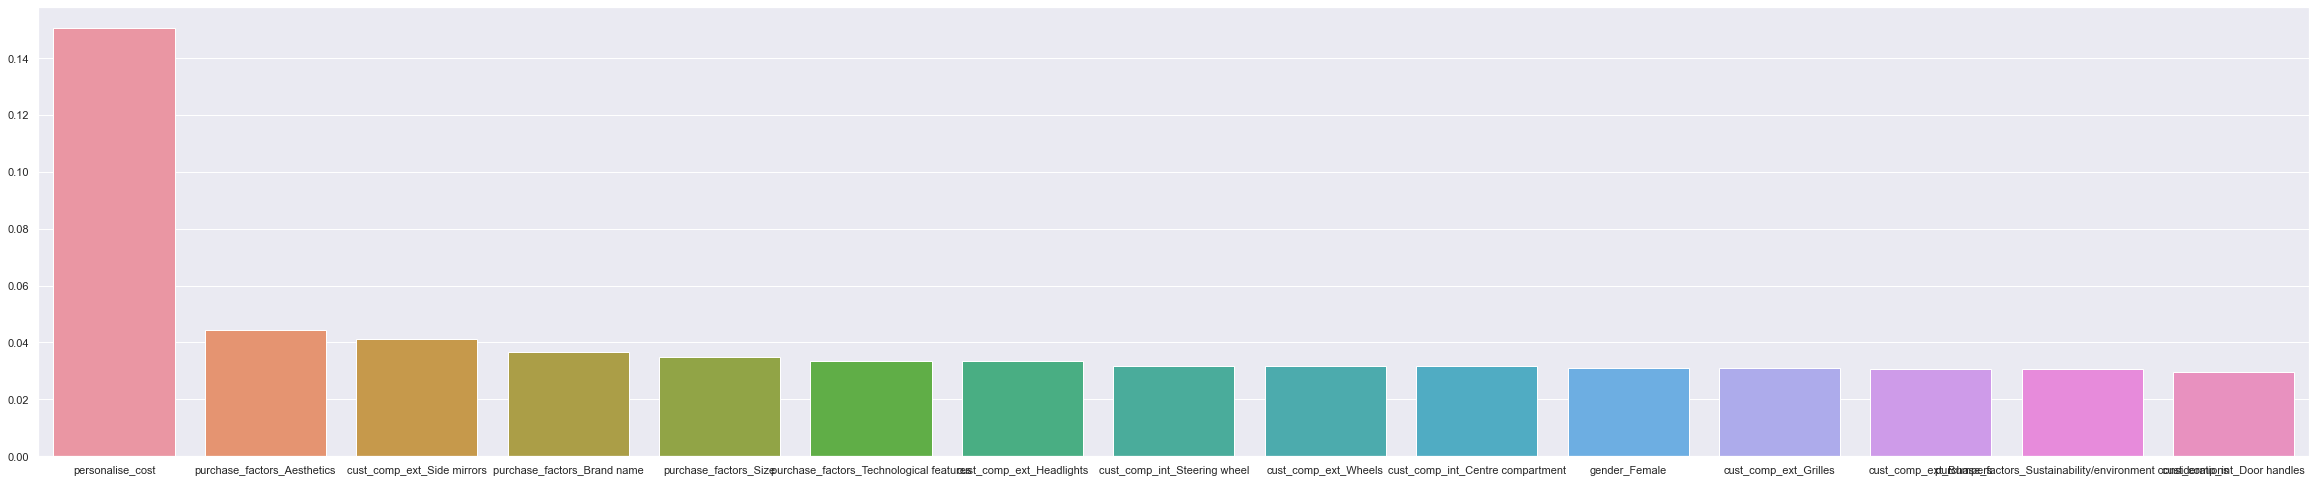

In [35]:
fig, ax = plt.subplots()
ax = sns.barplot(head.index,head.values)

In [36]:
#to improve the model, we will start to drop parameters with low feature importance

head = head.index.values.tolist()
print(head)

['personalise_cost', 'purchase_factors_Aesthetics', 'cust_comp_ext_Side mirrors', 'purchase_factors_Brand name', 'purchase_factors_Size', 'purchase_factors_Technological features', 'cust_comp_ext_Headlights', 'cust_comp_int_Steering wheel', 'cust_comp_ext_Wheels', 'cust_comp_int_Centre compartment', 'gender_Female', 'cust_comp_ext_Grilles', 'cust_comp_ext_Bumpers', 'purchase_factors_Sustainability/environment considerations', 'cust_comp_int_Door handles']


In [37]:
df_x_2 = df_x[df_x.columns.intersection(head)]

In [38]:
df_x_2

,personalise_cost,purchase_factors_Aesthetics,purchase_factors_Brand name,purchase_factors_Size,purchase_factors_Sustainability/environment considerations,purchase_factors_Technological features,cust_comp_ext_Bumpers,cust_comp_ext_Grilles,cust_comp_ext_Headlights,cust_comp_ext_Side mirrors,cust_comp_ext_Wheels,cust_comp_int_Centre compartment,cust_comp_int_Door handles,cust_comp_int_Steering wheel,gender_Female
0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,3,1,0,0,0,1,1,0,1,1,0,1,1,0,0
2,2,1,1,1,0,0,0,0,0,0,1,1,1,1,0
3,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1
4,2,1,0,0,0,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,1,0,0,1,0,0,1,0,1,0,0,1,0
96,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
97,2,1,0,1,1,1,0,0,0,1,1,0,0,1,1
98,3,0,0,0,0,1,0,0,1,1,0,1,0,0,0


In [39]:
df_y = rf_cleaned_df['cust_cost']
train_x, test_x, train_y, test_y = train_test_split(df_x_2, df_y, test_size = 0.3)

In [40]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (67, 15)
Training Labels Shape: (67,)
Testing Features Shape: (29, 15)
Testing Labels Shape: (29,)


In [41]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth = 10, n_jobs=-1)
rf.fit(train_x, train_y)
pred_y = rf.predict(test_x)

In [42]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

Accuracy: 0.3448275862068966


Text(135.79999999999998, 0.5, 'Truth')

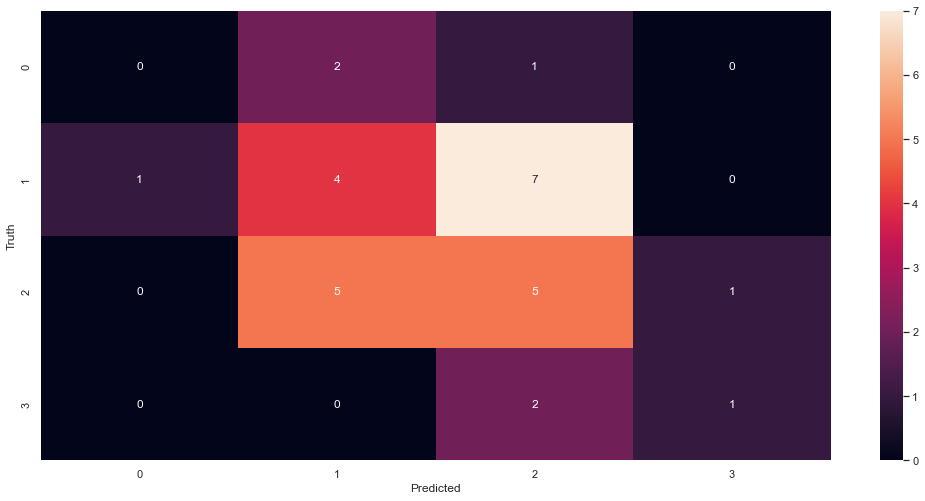

In [43]:
sns.set(rc={'figure.figsize':(17.7,8.27)})
cm = metrics.confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
importances = rf.feature_importances_
feature_names = test_x.columns.to_list()
forest_importances = pd.Series(importances, index=feature_names)

In [45]:
forest_importances

personalise_cost                                              0.272985
purchase_factors_Aesthetics                                   0.067121
purchase_factors_Brand name                                   0.051670
purchase_factors_Size                                         0.045928
purchase_factors_Sustainability/environment considerations    0.062665
purchase_factors_Technological features                       0.044241
cust_comp_ext_Bumpers                                         0.040860
cust_comp_ext_Grilles                                         0.052711
cust_comp_ext_Headlights                                      0.043355
cust_comp_ext_Side mirrors                                    0.040405
cust_comp_ext_Wheels                                          0.046058
cust_comp_int_Centre compartment                              0.052391
cust_comp_int_Door handles                                    0.040908
cust_comp_int_Steering wheel                                  0.047246
gender

In [46]:
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

C:\Users\weiji\anaconda3\envs\mienv\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [47]:

df_x_ord = df[['age','gender','car_status','rs_status','cust_willingness','personalise_interest','personalise_cost','personalise_ability','purchase_factors_Aesthetics','purchase_factors_Brand name','purchase_factors_Customisable options','purchase_factors_Functionality','purchase_factors_Price','purchase_factors_Size','purchase_factors_Sustainability/environment considerations','purchase_factors_Technological features','cust_comp_ext_Bumpers','cust_comp_ext_Grilles','cust_comp_ext_Headlights','cust_comp_ext_Side mirrors','cust_comp_ext_Wheels','cust_comp_int_Centre compartment','cust_comp_int_Dashboard','cust_comp_int_Door handles','cust_comp_int_Steering wheel']]

In [48]:
df_x_ord = df_x_ord.drop(columns=['gender','car_status','rs_status','personalise_interest','personalise_ability']) 

In [49]:
df_y = df['cust_cost']

In [50]:
df_y.astype

<bound method NDFrame.astype of 0     1
1     2
2     2
3     1
4     2
     ..
95    2
96    1
97    1
98    3
99    2
Name: cust_cost, Length: 96, dtype: category
Categories (4, int64): [0, 1, 2, 3]>

In [51]:

# mapper = {0 : '0', 1: 'under 500', 2 : '500-1000', 3:'over 1000'}
# df_y = df_y.replace(mapper)


In [52]:
mod_prob = OrderedModel(df_y,
                        df_x_ord,
                        distr='logit',
                        )

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

C:\Users\weiji\anaconda3\envs\mienv\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:206: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 0.813065
         Iterations: 67
         Function evaluations: 68
         Gradient evaluations: 68


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:              cust_cost   Log-Likelihood:                -78.054
Model:                   OrderedModel   AIC:                             202.1
Method:            Maximum Likelihood   BIC:                             261.1
Date:                Thu, 10 Feb 2022                                         
Time:                        18:48:34                                         
No. Observations:                  96                                         
Df Residuals:                      73                                         
Df Model:                          23                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
age                                                           -0.1320      0.352     -0.375      0.708      -0.823       0.559
cust_willingness                                               0.1146      0.517      0.222      0.825      -0.898       1.127
personalise_cost                                               2.6194      0.388      6.757      0.000       1.860       3.379
purchase_factors_Aesthetics                                    0.2628      0.494      0.532      0.595      -0.706       1.231
purchase_factors_Brand name                                    0.9983      0.509      1.962      0.050       0.001       1.996
purchase_factors_Customisable options                          0.4163      0.582      0.715      0.475      -0.725       1.558
purchase_factors_Functionality                                 0.1444      0.563      0.257      0.797      -0.958       1.247
purchase_factors_Price                                        -0.9111      0.909     -1.003      0.316      -2.692       0.870
purchase_factors_Size                                         -0.3650      0.494     -0.738      0.460      -1.334       0.604
purchase_factors_Sustainability/environment considerations     0.3022      0.500      0.604      0.546      -0.678       1.283
purchase_factors_Technological features                        0.0232      0.507      0.046      0.964      -0.971       1.017
cust_comp_ext_Bumpers                                         -0.1407      0.528     -0.266      0.790      -1.175       0.894
cust_comp_ext_Grilles                                         -0.2212      0.508     -0.435      0.663      -1.218       0.775
cust_comp_ext_Headlights                                      -0.0001      0.511     -0.000      1.000      -1.002       1.002
cust_comp_ext_Side mirrors                                    -0.1834      0.511     -0.359      0.720      -1.185       0.819
cust_comp_ext_Wheels                                           0.7308      0.578      1.264      0.206      -0.403       1.864
cust_comp_int_Centre compartment                              -0.3089      0.495     -0.624      0.533      -1.279       0.662
cust_comp_int_Dashboard                                       -0.0886      0.531     -0.167      0.868      -1.130       0.953
cust_comp_int_Door handles                                    -0.6614      0.572     -1.157      0.247      -1.782       0.459
cust_comp_int_Steering wheel                                   1.5540      0.586      2.651      0.008       0.405       2.703
0/1                                                            1.7651      1.756      1.005      0.315      -1.677       5.207
1/2                                                            1.1597      0.167      6.965      0.000       0.833

In [53]:
predicted_prob = res_prob.model.predict(res_prob.params, exog=df_x_ord)
predicted_prob

C:\Users\weiji\anaconda3\envs\mienv\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[7.89021023e-02, 5.96286216e-01, 3.12456965e-01, 1.23547167e-02],
       [7.57868830e-03, 1.48763076e-01, 7.20605792e-01, 1.23052443e-01],
       [4.17478164e-03, 8.81641507e-02, 7.04091900e-01, 2.03569168e-01],
       [1.91421419e-01, 6.60317344e-01, 1.43755301e-01, 4.50593538e-03],
       [1.80069189e-03, 4.01390233e-02, 5.85409630e-01, 3.72650655e-01],
       [6.69169129e-02, 5.68160582e-01, 3.50200807e-01, 1.47216986e-02],
       [2.13041190e-04, 4.93126367e-03, 1.60728061e-01, 8.34127635e-01],
       [1.33486551e-01, 6.55466737e-01, 2.04138877e-01, 6.90783465e-03],
       [3.97758528e-03, 8.43691629e-02, 7.00093526e-01, 2.11559726e-01],
       [4.31408812e-02, 4.79323839e-01, 4.54320078e-01, 2.32152018e-02],
       [1.91983656e-02, 3.02835515e-01, 6.26064047e-01, 5.19020727e-02],
       [7.14392365e-03, 1.41507309e-01, 7.21728518e-01, 1.29620250e-01],
       [3.91508691e-03, 8.31593930e-02, 6.98701453e-01, 2.14224067e-01],
       [3.10416998e-02, 4.06342351e-01, 5.30250218e

In [55]:
#to drop any with p value > 0.05
df_x_dropped = df_x_ord[['personalise_cost','purchase_factors_Brand name','cust_comp_int_Steering wheel']]

In [56]:
mod_logit = OrderedModel(df_y,
                        df_x_dropped,
                        distr='logit',
                        )

res_logit = mod_logit.fit(method='bfgs')
res_logit.summary()


C:\Users\weiji\anaconda3\envs\mienv\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:206: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 0.862567
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:              cust_cost   Log-Likelihood:                -82.806
Model:                   OrderedModel   AIC:                             177.6
Method:            Maximum Likelihood   BIC:                             193.0
Date:                Thu, 10 Feb 2022                                         
Time:                        18:48:35                                         
No. Observations:                  96                                         
Df Residuals:                      90                                         
Df Model:                           6                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
personalise_cost                 2.5153      0.353      7.118      0.000       1.823       3.208
purchase_factors_Brand name      0.9467      0.435      2.176      0.030       0.094       1.799
cust_comp_int_Steering wheel     1.4894      0.469      3.175      0.001       0.570       2.409
0/1                              2.2734      0.680      3.343      0.001       0.940       3.606
1/2                              1.0998      0.166      6.626      0.000       0.774       1.425
2/3                              1.2080      0.153      7.909      0.000       0.909       1.507
================================================================================================
"""

In [74]:
#Odds ratio
import math
oddsratio = {'personalise_cost' :2.5153,
            'purchase_factors_Brand name' : 0.9467,
            'cust_comp_int_Steering wheel' : 1.4894,         }


In [75]:
for key in oddsratio:    
    oddsratio[key] = math.exp(oddsratio[key]) 

In [76]:
print(oddsratio)

{'personalise_cost': 12.370319318298971, 'purchase_factors_Brand name': 2.577190881154859, 'cust_comp_int_Steering wheel': 4.434434060209744}


In [60]:
df_y = df['personalise_cost']

In [61]:
df_x_ord = df_x_ord.join(df['cust_cost'])


In [62]:
df_x_ord = df_x_ord.drop(columns = ['personalise_cost'])

In [63]:
df_x_ord

,age,cust_willingness,purchase_factors_Aesthetics,purchase_factors_Brand name,purchase_factors_Customisable options,purchase_factors_Functionality,purchase_factors_Price,purchase_factors_Size,purchase_factors_Sustainability/environment considerations,purchase_factors_Technological features,cust_comp_ext_Bumpers,cust_comp_ext_Grilles,cust_comp_ext_Headlights,cust_comp_ext_Side mirrors,cust_comp_ext_Wheels,cust_comp_int_Centre compartment,cust_comp_int_Dashboard,cust_comp_int_Door handles,cust_comp_int_Steering wheel,cust_cost
0,0,2,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1
1,0,2,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,2
2,0,2,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,2
3,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1
4,0,2,1,0,1,1,0,0,0,0,0,1,1,1,1,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,2,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,2
96,0,2,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1
97,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,1,1
98,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,3


In [64]:
df_y

0     2
1     3
2     2
3     1
4     2
     ..
95    2
96    1
97    2
98    3
99    2
Name: personalise_cost, Length: 96, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [66]:
mod_log = OrderedModel(df_y,
                        df_x_ord,
                        distr='logit',
                        )

res_log = mod_log.fit(method='bfgs')
res_log.summary()

C:\Users\weiji\anaconda3\envs\mienv\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:206: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 0.810010
         Iterations: 65
         Function evaluations: 66
         Gradient evaluations: 66


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:       personalise_cost   Log-Likelihood:                -77.761
Model:                   OrderedModel   AIC:                             201.5
Method:            Maximum Likelihood   BIC:                             260.5
Date:                Thu, 10 Feb 2022                                         
Time:                        18:51:00                                         
No. Observations:                  96                                         
Df Residuals:                      73                                         
Df Model:                          23                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
age                                                            0.3849      0.361      1.066      0.286      -0.322       1.092
cust_willingness                                              -0.5178      0.521     -0.995      0.320      -1.538       0.503
purchase_factors_Aesthetics                                   -0.5790      0.489     -1.184      0.236      -1.537       0.379
purchase_factors_Brand name                                   -0.6306      0.515     -1.225      0.221      -1.639       0.378
purchase_factors_Customisable options                         -0.0171      0.584     -0.029      0.977      -1.161       1.127
purchase_factors_Functionality                                -0.6834      0.562     -1.215      0.224      -1.785       0.419
purchase_factors_Price                                        -1.0850      0.913     -1.189      0.235      -2.874       0.704
purchase_factors_Size                                         -0.0423      0.491     -0.086      0.931      -1.004       0.919
purchase_factors_Sustainability/environment considerations    -0.9172      0.495     -1.855      0.064      -1.886       0.052
purchase_factors_Technological features                        0.3820      0.514      0.743      0.458      -0.626       1.390
cust_comp_ext_Bumpers                                         -0.0631      0.524     -0.120      0.904      -1.091       0.965
cust_comp_ext_Grilles                                          0.0892      0.513      0.174      0.862      -0.915       1.094
cust_comp_ext_Headlights                                       0.4828      0.518      0.933      0.351      -0.532       1.498
cust_comp_ext_Side mirrors                                    -0.1860      0.514     -0.362      0.717      -1.192       0.821
cust_comp_ext_Wheels                                          -0.6235      0.591     -1.055      0.291      -1.782       0.535
cust_comp_int_Centre compartment                               0.7209      0.507      1.423      0.155      -0.272       1.714
cust_comp_int_Dashboard                                        0.2497      0.536      0.466      0.641      -0.801       1.300
cust_comp_int_Door handles                                     1.0488      0.598      1.753      0.080      -0.124       2.221
cust_comp_int_Steering wheel                                  -1.6444      0.575     -2.860      0.004      -2.771      -0.517
cust_cost                                                      2.7070      0.402      6.734      0.000       1.919       3.495
0/1                                                           -3.1576      1.708     -1.849      0.064      -6.505       0.190
1/2                                                            1.1832      0.171      6.904      0.000       0.847

In [77]:
#to drop any with p value > 0.05
df_x_dropped = df_x_ord[['cust_cost','cust_comp_int_Steering wheel']]

In [78]:
mod_logit = OrderedModel(df_y,
                        df_x_dropped,
                        distr='logit',
                        )

res_logit = mod_logit.fit(method='bfgs')
res_logit.summary()


Optimization terminated successfully.
         Current function value: 0.898156
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


C:\Users\weiji\anaconda3\envs\mienv\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:206: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:       personalise_cost   Log-Likelihood:                -86.223
Model:                   OrderedModel   AIC:                             182.4
Method:            Maximum Likelihood   BIC:                             195.3
Date:                Thu, 10 Feb 2022                                         
Time:                        19:40:40                                         
No. Observations:                  96                                         
Df Residuals:                      91                                         
Df Model:                           5                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
cust_cost                        2.4813      0.350      7.092      0.000       1.796       3.167
cust_comp_int_Steering wheel    -1.2910      0.462     -2.794      0.005      -2.197      -0.385
0/1                             -0.4233      0.531     -0.797      0.426      -1.465       0.618
1/2                              1.1104      0.170      6.515      0.000       0.776       1.444
2/3                              1.1010      0.150      7.324      0.000       0.806       1.396
================================================================================================
"""